# Watch Me Code 2: Plotly and Chart Studio

- Plotly is a cloud based plotting service. It uses the popular JavaScript library D3.js.
- Plotly is simple to use 

In [3]:
!pip install chart-studio plotly -qq --upgrade

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/conda/etc/jupyter/nbconfig/notebook.d/jupyterlab-plotly.json'
Consider using the `--user` option or check the permissions.



In [17]:
import chart_studio as plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from IPython.display import display

To use plot.ly you need to sign up for a free account then get API credentials. https://chart-studio.plot.ly/settings/api

In [18]:
# setup the credentials
# GET YOUR OWN CREDENTIALS!!!!!!!!

plotly.tools.set_credentials_file(username='mafudge73fc', api_key='q5Lg5VEVNXO1ygKV56tl')

In [19]:
# Start with a Simple Pandas DataFrame
grades = { 'subjects' : ['Mathematics', 'English', 'History', 'Science', 'Arts'],
           'grades' : [67, 60, 36, 61, 58]
         }
grades_df = pd.DataFrame(grades)
grades_df

,subjects,grades
0,Mathematics,67
1,English,60
2,History,36
3,Science,61
4,Arts,58


To plot with plotly, we need:

- To create a figure
- to add a series (trace)
- label the axis
- show the plot

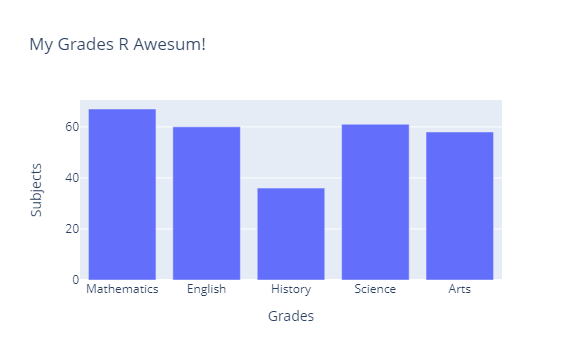

In [20]:
grade_data = go.Bar(x=grades_df['subjects'], y=grades_df['grades'])
figure = go.Figure()
figure.add_trace(grade_data)
figure.update_layout(
    title='My Grades R Awesum!', 
    xaxis_title='Grades', 
    yaxis_title='Subjects')
figure.show()

Plotly express makes it easy to plot a dataframe

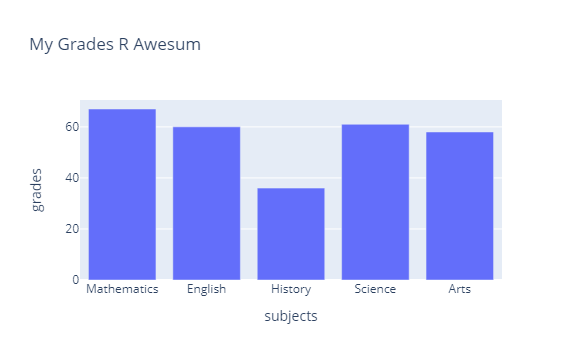

In [21]:
# Same plot as a one-liner using plotly.express
px.bar(grades_df, x='subjects', y='grades', title='My Grades R Awesum')

How about an example with multiple series? For that we need to pull in another dataset

In [24]:
cuse_weather_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/weather/syracuse-ny.csv')
cuse_weather_df = cuse_weather_df[ cuse_weather_df['EST'].str.startswith('2015-')] 
cuse_weather_df.head(5)

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
6480,2015-1-1,34,27.0,20,25,13,8,91,64,36,...,10,8,1,28,12,33.0,0.01,8,Snow,248
6481,2015-1-2,31,23.0,15,26,23,15,100,82,63,...,10,4,0,22,9,28.0,0.03,8,Fog-Snow,285
6482,2015-1-3,40,28.0,15,37,23,15,100,87,74,...,10,6,1,21,10,29.0,0.97,8,Rain-Snow,84
6483,2015-1-4,55,44.0,33,51,39,27,100,88,76,...,10,10,7,35,13,45.0,0.03,8,Rain-Snow,259
6484,2015-1-5,33,22.0,10,28,10,-3,88,70,51,...,10,8,1,37,22,47.0,0.01,6,Snow,274


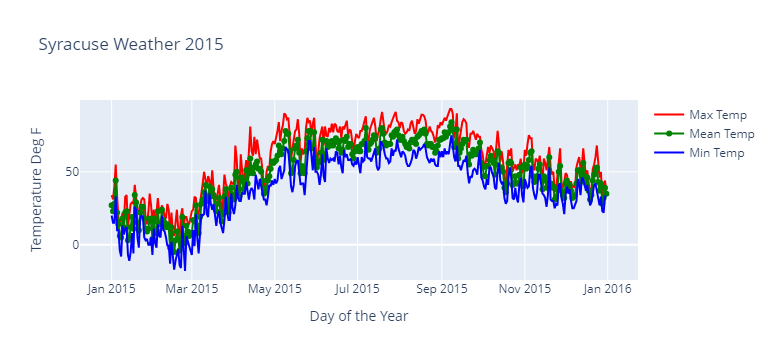

In [25]:
r = dict(color='red')
g = dict(color='green')
b = dict(color='blue')
weather_data = [
    go.Scatter(x=cuse_weather_df['EST'], y=cuse_weather_df['Max TemperatureF'], mode="lines", name="Max Temp", marker=r),
    go.Scatter(x=cuse_weather_df['EST'], y=cuse_weather_df['Mean TemperatureF'], mode="lines+markers", name="Mean Temp", marker=g),
    go.Scatter(x=cuse_weather_df['EST'], y=cuse_weather_df['Min TemperatureF'], mode="lines", name="Min Temp", marker=b)
]

figure = go.Figure()
for w in weather_data:
    figure.add_trace(w)
figure.update_layout(title='Syracuse Weather 2015',
                   xaxis_title='Day of the Year',
                   yaxis_title='Temperature Deg F')
figure.show()


Here's another example with the Exam Scores Dataset. Shows you how much more expressive plot.ly can be.

In [10]:
scores_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv')
scores_df = scores_df.sort_values(by='Student_Score')
scores_df[0:6]

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
23,M01,D,35,?,?,?,13,43.30%,F
8,M01,B,20,N,N,Y,13,43.30%,F
21,M01,D,25,N,N,Y,15,50.00%,D
29,M02,A,20,N,N,N,16,53.30%,D
52,M02,C,40,Y,Y,N,16,53.30%,D
56,M02,C,60,N,N,Y,16,53.30%,D


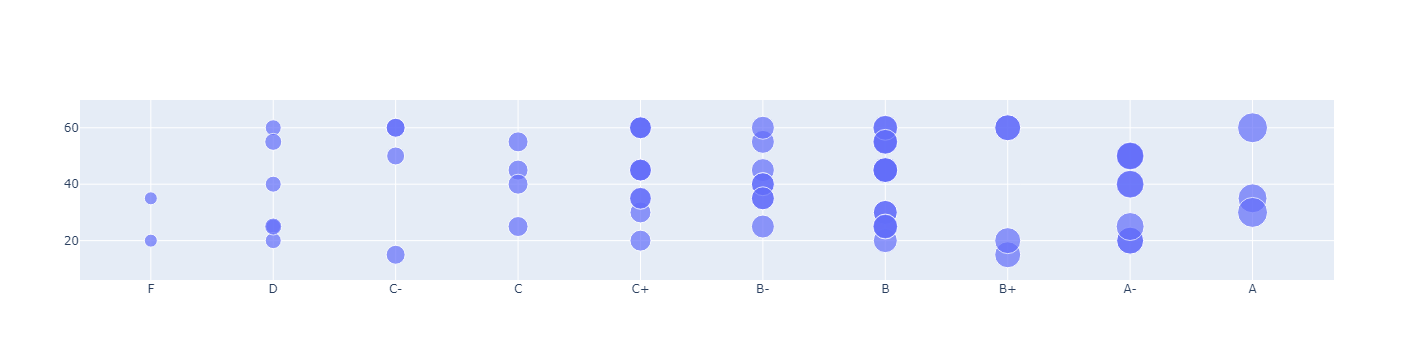

In [11]:
f = go.Figure()
series = go.Scatter(x=scores_df['Letter_Grade'], y=scores_df['Completion_Time'], mode="markers",  marker= { 'size': scores_df['Student_Score'], 'sizemode' : 'diameter', 'sizeref' : 1.0})
f.add_trace(series)
f.show()


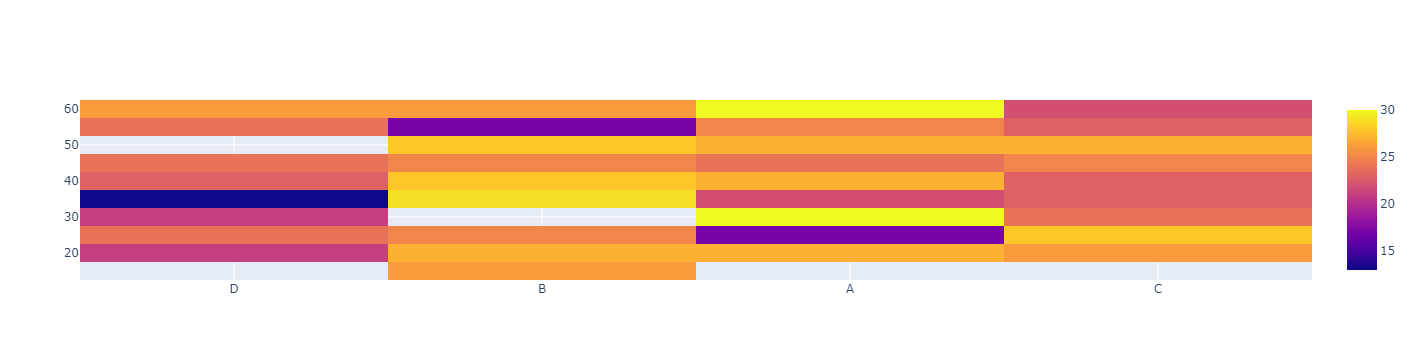

In [12]:
f = go.Figure()
f.add_trace(go.Heatmap(x=scores_df['Exam_Version'], y=scores_df['Completion_Time'], z=scores_df['Student_Score']))
f.show()


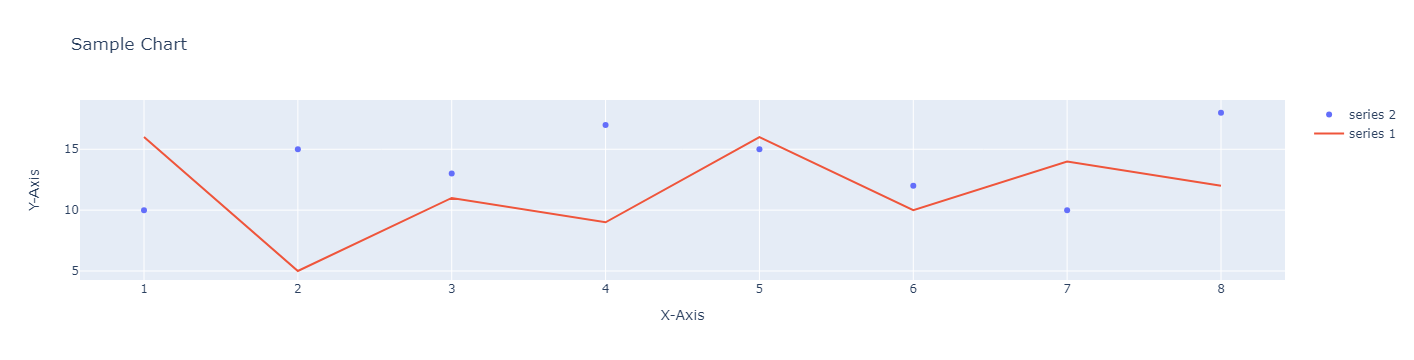

In [13]:
# A manual sample, showing you don't need to use Pandas at all.

trace0 = go.Scatter(
    x=[1,2,3,4,5,6,7,8],
    y=[10, 15, 13, 17, 15, 12, 10, 18],
    mode = "markers",
    name = "series 2"
)
trace1 = go.Scatter(
    x=[1,2,3,4,5,6,7,8],
    y=[16, 5, 11, 9, 16, 10, 14, 12],
    mode="lines",
    name = "series 1"
)

f = go.Figure()
f.add_trace(trace0)
f.add_trace(trace1)
f.update_layout(title='Sample Chart',
                   xaxis_title='X-Axis',
                   yaxis_title='Y-Axis')
f.show()


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# make the drawing figure
fig = go.Figure(go.Scatter(x=df.gdpPercap, y=df.lifeExp, text=df.country, mode='markers', name='2007'))
fig.update_xaxes(title_text='GDP per Capita', type='log')
fig.update_yaxes(title_text='Life Expectancy')

#save it under a specific name
py.plot(fig, filename='pandas-multiple-scatter')
#show it
fig.show()

PlotlyRequestError: Bad API key

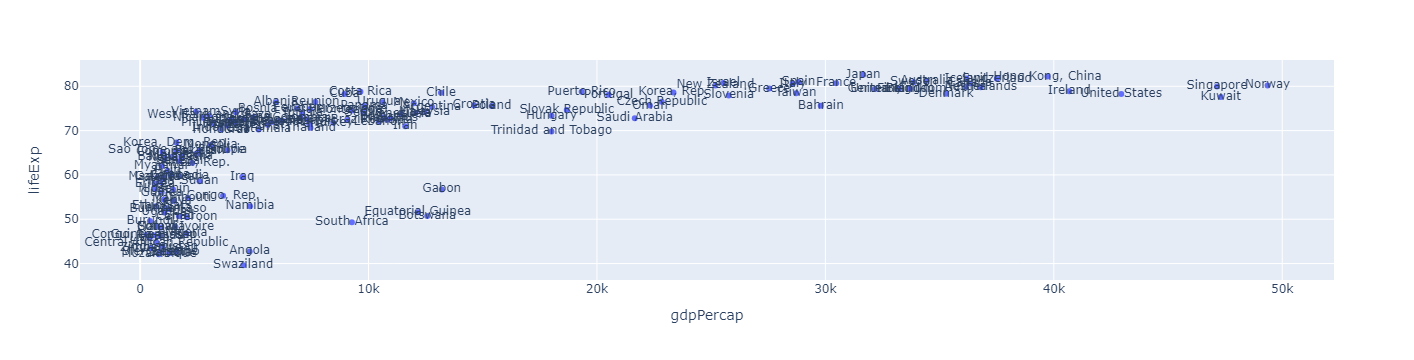

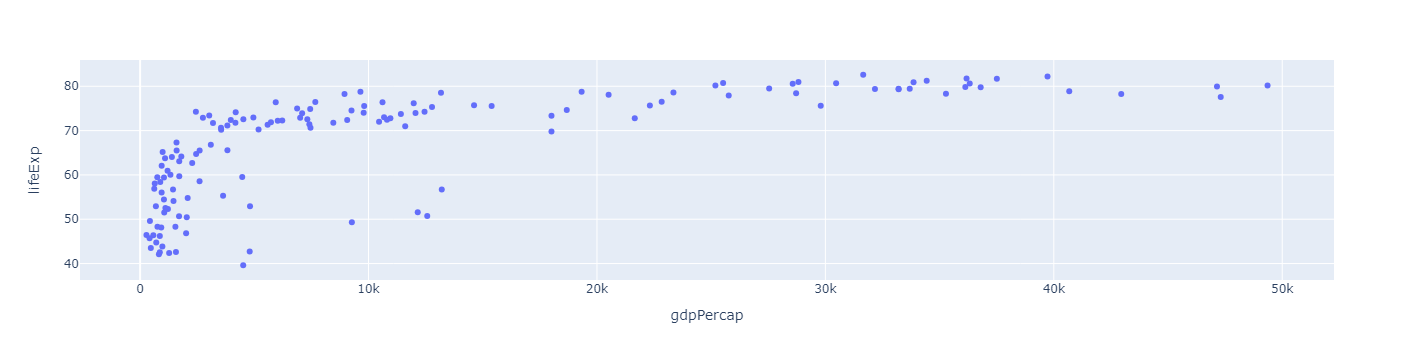

In [16]:
# example using px also using ipython display
from IPython.display import display, HTML

display(HTML("<h1> CHART 1</h1>"))
display(px.scatter(df, x='gdpPercap', y='lifeExp', text='country'))
display(HTML("<h1> CHART 2</h1>"))
display(px.scatter(df, x='gdpPercap', y='lifeExp', text=None))
